In [27]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow .keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
%matplotlib inline

In [28]:
DIR= 'C:/Users/USER/Documents/DataSet/Computer Vision/dataset-20200521T120945Z-001/dataset'
classes = ['with mask','without mask']
img_data = []
label_data = []
img_size = 100
labels=[i for i in range(len(classes))]
dict_lebel = dict(zip(classes,labels))


for i in classes:
    path = os.path.join(DIR, i)
    
    for j in os.listdir(path):
        img = cv2.imread(os.path.join(path,j))
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_gray_resized = cv2.resize(img_gray,(img_size,img_size))
        img_data.append(img_gray_resized)
        label_data.append(dict_lebel[i])
        

In [29]:
img_data = np.array(img_data)/255.0
img_data = np.reshape(img_data,(img_data.shape[0],img_size,img_size,1))
label_data = np.array(label_data)


In [30]:
img_data.shape

(1376, 100, 100, 1)

In [31]:
target = tf.keras.utils.to_categorical(label_data)

In [35]:
target.shape

(1376, 2)

In [52]:


model=models.Sequential()

model.add(layers.Conv2D(200,(3,3),input_shape=img_data.shape[1:]))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(layers.Conv2D(100,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(layers.Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(layers.Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 52900)            

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(img_data,target,test_size=0.1)

In [56]:
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 114s 115ms/sample - loss: 0.7010 - accuracy: 0.5980 - val_loss: 0.6625 - val_accuracy: 0.6734
Epoch 2/20
990/990 [==============================] - 101s 102ms/sample - loss: 0.6172 - accuracy: 0.7798 - val_loss: 0.5961 - val_accuracy: 0.8145
Epoch 3/20
990/990 [==============================] - 104s 105ms/sample - loss: 0.5622 - accuracy: 0.8939 - val_loss: 0.5725 - val_accuracy: 0.8710
Epoch 4/20
990/990 [==============================] - 105s 106ms/sample - loss: 0.5502 - accuracy: 0.9141 - val_loss: 0.5614 - val_accuracy: 0.8871
Epoch 5/20
990/990 [==============================] - 101s 102ms/sample - loss: 0.5396 - accuracy: 0.9354 - val_loss: 0.5518 - val_accuracy: 0.9073
Epoch 6/20
990/990 [==============================] - 101s 102ms/sample - loss: 0.5321 - accuracy: 0.9505 - val_loss: 0.5504 - val_accuracy: 0.9113
Epoch 7/20
990/990 [==============================] - 102s 103ms/s

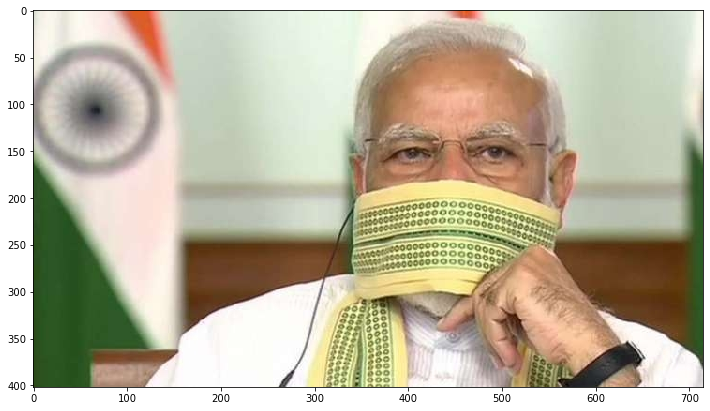

In [215]:
labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

modi_image = cv2.imread('mask8.jpg')
# modi_img_resized = cv2.resize(modi_img,(300,300))
gray_modi1 = cv2.cvtColor(modi_image,cv2.COLOR_BGR2GRAY)
color_modi = cv2.cvtColor(modi_image,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,10))
plt.imshow(color_modi,cmap='gray')

In [216]:


mask = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
corr = mask.detectMultiScale(gray_modi)
def mask_detection(img):
    modi_img_kk = img.copy()
    gray_modi_kk = cv2.cvtColor(modi_img_kk,cv2.COLOR_BGR2GRAY)
    corr_kk = mask.detectMultiScale(gray_modi_kk)

    for (x,y,w,h) in corr_kk:
        face_kk = gray_modi_kk[y:y+h,x:x+w]

        resized_kk=cv2.resize(face_kk,(100,100))
        normalized_kk=resized_kk/255.0
        reshaped_kk=np.reshape(normalized_kk,(1,100,100,1))
        result_kk=model.predict(reshaped_kk)

        label_kk=np.argmax(result_kk,axis=1)[0]

        cv2.rectangle(modi_img_kk,(x,y),(x+w,y+h),color_dict[label_kk],7)
        cv2.rectangle(modi_img_kk,(x,y),(x+w,y+h),color_dict[label_kk],2)
        cv2.putText(modi_img_kk,labels_dict[label_kk], (x-10, y),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1,lineType = cv2.LINE_AA)
        return modi_img_kk

In [217]:
mask_lite = mask_detection(modi_image)
mask_lite_color = cv2.cvtColor(mask_lite,cv2.COLOR_BGR2RGB)

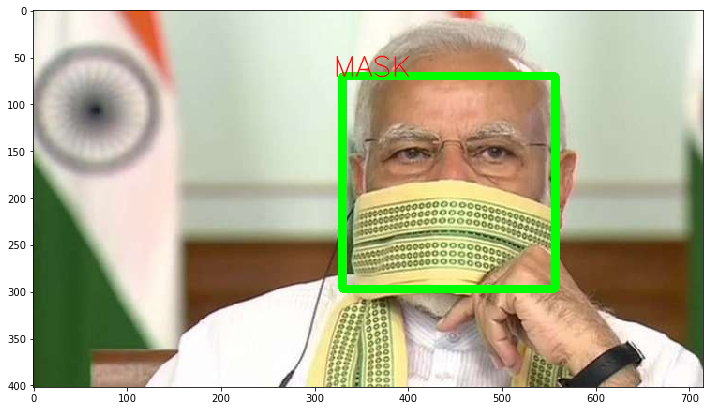

In [218]:
plt.figure(figsize=(12,10))
plt.imshow(mask_lite_color)

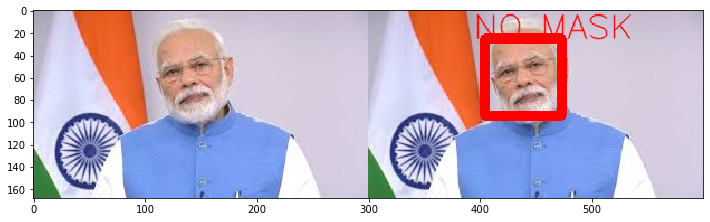

In [171]:
kk = cv2.imread('normal1.jpg')
result1 = mask_detection(kk)
kk_color = cv2.cvtColor(kk,cv2.COLOR_BGR2RGB)
result1 = cv2.cvtColor(result1,cv2.COLOR_BGR2RGB)
concat = np.concatenate((kk_color,result1),axis = 1)
plt.figure(figsize=(12,10))
plt.imshow(concat)
